<h1> Coursera Capstone Project </h1>

## Table of contents
* [1. Introduction/Business Problem](#introduction)
* [2. Data to be used for finding the best location for Pizza Place in Etobicoke, Toronto](#data)
* [3. Methodology](#methodology)
* [4. Results](#results)
* [5. Discussions](#discussions)
* [6. Conclusion](#conclusion)
* [7. References](#references)

## 1. Introduction/Business Problem <a name="introduction"></a>

**1.1 Introduction**

<p>Toronto is the capital city of the Canadian province of Ontario. With a recorded population of 2,731,571 in 2016,[1] it is the most populous city in Canada and the fourth most populous city in North America. The city is the anchor of the Golden Horseshoe, an urban agglomeration of 9,245,438 people (as of 2016) surrounding the western end of Lake Ontario,[2] while the Greater Toronto Area (GTA) proper had a 2016 population of 6,417,516. Toronto is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world.</p>
<p>The 140 neighborhoods used by the City of Toronto were developed to help government and community organizations with their local planning by providing socio-economic data at a meaningful geographic area. The boundaries of these social planning neighborhoods do not change over time, allowing researchers to examine changes over time. In order to ensure high quality social data, the neighborhoods were defined based on Statistics Canada Census Tract boundaries. Census Tracts include several city blocks and have on average about 4,000 people. Neighborhoods are comprised of from 2 to 5 Census Tracts.[3]</p>

Location can make the difference between a successful restaurant and a good idea that never really got off the ground. It is all about finding the right ingredients – the right combination of a desirable location, key demographics, and available parking – when cooking up a recipe for a successful restaurant. [4] And further steps are required to analyze and be taken in consideration, including creating a business plan, having bank approval or finance available, recruiting a team and decide about equipment suppliers, etc..


**1.2. Business Problem**

The purpose of this project is to examine the most suitable and convenient for somebody who wants to open an Italian Pizza Place in Etobicoke borough, Toronto.

The location of the Pizza Place should be in one of the Eobicoke neighborhoods where no Pizza Place is present or a limited of such places, but there is enough population to sustain such business, including people with Italian descend.

Another factor determining an optimum solution where to start a new Pizza Place is linked to the neighborhoods people's income. More people earning more money is linked proportionally to people spending more time and money into restaurants.


<h2> 2. Data to be used for finding the best location for Pizza Place in Etobicoke, Toronto</h2> <a name="data"></a>

For solving our business problem, the following data processing was required:
- Exloring and clustering the neighborhoods in Toronto, based on the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data required to build our table of postal codes and to transform the data into a suitable format that we will use to interpret and provide a solution. This willbe done using BeautifulSoup package.
- Importing the populations for each Toronto borough from: https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/hlt-fst/pd-pl/Tables/File.cfm?T=1201&SR=1&RPP=9999&PR=0&CMA=0&CSD=0&S=22&O=A&Lang=Eng&OFT=CSV.
- Importing average inomeafter tax for each neighborhood from stat Canada: https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/search-recherche/change-geo.cfm?Lang=E&Geo1=FSA
- Scraping HTML Tables from wiki page:'https://en.wikipedia.org/wiki/Demographics_of_Toronto'
- Using Foursquare location data to extract the information with the most common venues, fit them into clusters, and determine the best outcome cluster using k-means clustering.
- Using geopy library to get the latitude and longitude values of Toronto and Etobicoke.
- Using **Folium** for great visualization into the generated map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.
- Simplifying the generated Etobicoke map and segment and cluster only the neighborhoods in ETOBICOKE.

For this assignment, we will explore and cluster the neighborhoods in Toronto, based on the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data required to build our table of postal codes and to transform the data into a pandas  dataframe.

We will construct the dataframe consisting of three columns: PostalCode, Borough, and Neighborhood.
Only the cells that have an assigned borough will be processed. We will ignore cells with a borough that is Not assigned.

In [2]:
import numpy as np # library to handle data in a vectorized manner
from bs4 import BeautifulSoup
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import csv
import locale
#import geojson



import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy import geocoders

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns

import lxml
import re

import os

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.spatial.distance import cdist

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#!pip install folium
import folium # map rendering library
import folium.map

print('folium intalled')

import matplotlib.pyplot as plt

print('Libraries imported.')

# install wordcloud
#!conda install -c conda-forge wordcloud==1.4.1 --yes
!pip install wordcloud
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

folium intalled
Libraries imported.
Wordcloud is installed and imported!


## 3. Methodology <a name="methodology"></a>

Below are presented the steps required to to transform the data in the table on the Wikipedia page into the a pandas dataframe, using the BeautifulSoup package.

Transform the data in the table on the Wikipedia page into the below pandas dataframe.

### Scraping the List of postal codes:

In [3]:
list_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(list_url).text
soup = BeautifulSoup(source, 'xml')
table=soup.find('table')

# dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
column_names = ['PostalCode','Borough','Neighborhood']
df = pd.DataFrame(columns = column_names)

# search all the postcode, borough, neighborhood 
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data

df.head()

PostalCode           Borough               Neighborhood
0        M1A      Not assigned               Not assigned
1        M2A      Not assigned               Not assigned
2        M3A        North York                  Parkwoods
3        M4A        North York           Victoria Village
4        M5A  Downtown Toronto  Regent Park, Harbourfront

Only the cells that have an assigned borough willbe processed. Ignore cells with a borough that is Not assigned.

The rows with same postalcode will be combined into one row with the neighborhoods separated with a comma.

In [4]:
# remove rows where Borough is 'Not assigned'
df = df[df['Borough']!='Not assigned']
df.head()

PostalCode           Borough                                 Neighborhood
2        M3A        North York                                    Parkwoods
3        M4A        North York                             Victoria Village
4        M5A  Downtown Toronto                    Regent Park, Harbourfront
5        M6A        North York             Lawrence Manor, Lawrence Heights
6        M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government

### Scraping the demographic ethnic table from Wikipedia:

Scraping HTML Tables from wiki page:'https://en.wikipedia.org/wiki/Demographics_of_Toronto'

In [5]:
url='https://en.wikipedia.org/wiki/Demographics_of_Toronto'
tables = pd.read_html(url)
print("There are : ",len(tables)," tables")
#tables

There are :  38  tables


From the Wikipedia page we observe that from 38 tables, table 15 is referrring to ETOBICOKE neighborhoods etinicity.

In [6]:
etobicoke_etnicity= tables[15]

etobicoke_etnicity.head(20)

Riding  Population Ethnic Origin #1     % Ethnic Origin #2  \
0  Etobicoke-Lakeshore      127520          English  17.1         Canadian   
1      Etobicoke North      116960      East Indian  22.2         Canadian   
2     Etobicoke Centre      116055          Italian  15.1          English   
3    York South-Weston      115130       Portuguese  14.5          Italian   

    %.1 Ethnic Origin #3   %.2 Ethnic Origin #4   %.3 Ethnic Origin #5   %.4  \
0  15.9            Irish  14.4         Scottish  13.5           Polish   9.2   
1   7.9              NaN   NaN              NaN   NaN              NaN   NaN   
2  14.3         Canadian  12.1            Irish  10.8         Scottish  10.4   
3  12.8         Canadian   8.7         Jamaican   8.4              NaN   NaN   

  Ethnic Origin #6  %.5 Ethnic Origin #7  %.6 Ethnic Origin #8  %.7  
0          Italian  9.1        Ukrainian  7.6           German  7.1  
1              NaN  NaN              NaN  NaN              NaN  NaN  
2        Ukrainian  8.1           Polish  7.4              NaN  NaN  
3              NaN  NaN              NaN  NaN              NaN  NaN

In [7]:
Mycolumns = ['Riding', 'Population', 'Ethnic Origin #1', '%', 'Ethnic Origin #2',
       '%.1', 'Ethnic Origin #3', '%.2', 'Ethnic Origin #4', '%.3', 'Ethnic Origin #5', '%.4', 'Ethnic Origin #6', '%.5']
frames = [etobicoke_etnicity[Mycolumns]]

Ethnic_df = pd.concat(frames,axis=0,sort=False,ignore_index=True)
Ethnic_df

Riding  Population Ethnic Origin #1     % Ethnic Origin #2  \
0  Etobicoke-Lakeshore      127520          English  17.1         Canadian   
1      Etobicoke North      116960      East Indian  22.2         Canadian   
2     Etobicoke Centre      116055          Italian  15.1          English   
3    York South-Weston      115130       Portuguese  14.5          Italian   

    %.1 Ethnic Origin #3   %.2 Ethnic Origin #4   %.3 Ethnic Origin #5   %.4  \
0  15.9            Irish  14.4         Scottish  13.5           Polish   9.2   
1   7.9              NaN   NaN              NaN   NaN              NaN   NaN   
2  14.3         Canadian  12.1            Irish  10.8         Scottish  10.4   
3  12.8         Canadian   8.7         Jamaican   8.4              NaN   NaN   

  Ethnic Origin #6  %.5  
0          Italian  9.1  
1              NaN  NaN  
2        Ukrainian  8.1  
3              NaN  NaN

In [8]:
#Rename column 'Neighbourhood'
Ethnic_df.rename(columns = {'Riding' : 'Neighborhood','%':'Percentage #1',
                            '%.1':'Percentage #2','%.2':'Percentage #3','%.3':'Percentage #4'},inplace = True)

In [9]:
Ethnic_df.fillna(0,inplace=True)

In [10]:
print('The data frame of 6 first Ethnic groups distribution per Neighborhood')
Ethnic_df.head()

The data frame of 6 first Ethnic groups distribution per Neighborhood


Neighborhood  Population Ethnic Origin #1  Percentage #1  \
0  Etobicoke-Lakeshore      127520          English           17.1   
1      Etobicoke North      116960      East Indian           22.2   
2     Etobicoke Centre      116055          Italian           15.1   
3    York South-Weston      115130       Portuguese           14.5   

  Ethnic Origin #2  Percentage #2 Ethnic Origin #3  Percentage #3  \
0         Canadian           15.9            Irish           14.4   
1         Canadian            7.9                0            0.0   
2          English           14.3         Canadian           12.1   
3          Italian           12.8         Canadian            8.7   

  Ethnic Origin #4  Percentage #4 Ethnic Origin #5   %.4 Ethnic Origin #6  %.5  
0         Scottish           13.5           Polish   9.2          Italian  9.1  
1                0            0.0                0   0.0                0  0.0  
2            Irish           10.8         Scottish  10.4        Ukrainian  8.1  
3         Jamaican            8.4                0   0.0                0  0.0

In [11]:
Ethnic_df.shape

(4, 14)

In [12]:
#Rename column 'Neighbourhood'
Ethnic_df.rename(columns = {'Riding' : 'Neighborhood','%':'Percentage #1',
                            '%.1':'Percentage #2','%.2':'Percentage #3','%.3':'Percentage #4', '%.4':'Percentage #5', '%.5':'Percentage #6'},inplace = True)

In [13]:
Ethnic_df.fillna(0,inplace=True)

In [14]:
print('The data frame of 6 first Ethnic groups distribution per Neighborhood')
Ethnic_df.head()

The data frame of 6 first Ethnic groups distribution per Neighborhood


Neighborhood  Population Ethnic Origin #1  Percentage #1  \
0  Etobicoke-Lakeshore      127520          English           17.1   
1      Etobicoke North      116960      East Indian           22.2   
2     Etobicoke Centre      116055          Italian           15.1   
3    York South-Weston      115130       Portuguese           14.5   

  Ethnic Origin #2  Percentage #2 Ethnic Origin #3  Percentage #3  \
0         Canadian           15.9            Irish           14.4   
1         Canadian            7.9                0            0.0   
2          English           14.3         Canadian           12.1   
3          Italian           12.8         Canadian            8.7   

  Ethnic Origin #4  Percentage #4 Ethnic Origin #5  Percentage #5  \
0         Scottish           13.5           Polish            9.2   
1                0            0.0                0            0.0   
2            Irish           10.8         Scottish           10.4   
3         Jamaican            8.4                0            0.0   

  Ethnic Origin #6  Percentage #6  
0          Italian            9.1  
1                0            0.0  
2        Ukrainian            8.1  
3                0            0.0

In [15]:
Ethnic_df.to_csv('file1.csv') 

We are looking on the internet to identify the missing etnic information for some neighborhoods.

Information is taken from https://www.toronto.ca/wp-content/uploads/2018/05/972c-City_Planning_2016_Census_Profile_2014_Wards_Ward01.pdf

From saved csv file we added missing values from *file.csv* we scrapped from the above link for Etobicoke North Neighborhood.

We have created a new csv file with all info relevant for out business problem.

In [16]:
Ethnic_df2 = pd.read_csv('fileetnic.csv',encoding = 'unicode_escape')
Ethnic_df2.head()

Neighborhood  Population Ethnic Origin #1  Percentage #1  \
0  Etobicoke-Lakeshore    127520.0          English           17.1   
1      Etobicoke North    116960.0      East Indian           22.2   
2     Etobicoke Centre    116055.0          Italian           15.1   

  Ethnic Origin #2  Percentage #2 Ethnic Origin #3  Percentage #3  \
0         Canadian           15.9            Irish           14.4   
1         Jamaican            6.2         Canadian            5.7   
2          English           14.3         Canadian           12.1   

  Ethnic Origin #4  Percentage #4 Ethnic Origin #5  Percentage #5  \
0         Scottish           13.5           Polish            9.2   
1            Iraqi            4.8          Italian            3.9   
2            Irish           10.8         Scottish           10.4   

  Ethnic Origin #6  Percentage #6  
0          Italian            9.1  
1         Filipino            3.2  
2        Ukrainian            8.1

#### We will manually download and clean the data with the census population from 2016.

In [17]:
# Load this data from Stats Canada
df_pop = pd.read_csv('https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/hlt-fst/pd-pl/Tables/File.cfm?T=1201&SR=1&RPP=9999&PR=0&CMA=0&CSD=0&S=22&O=A&Lang=Eng&OFT=CSV',encoding = 'unicode_escape')
# Rename the columns appropiatley
df_pop = df_pop.rename(columns={'Geographic code':'PostalCode', 'Geographic name':'PostalCod2', 'Province or territory':'Province', 'Incompletely enumerated Indian reserves and Indian settlements, 2016':'Incomplete', 'Population, 2016':'Population_2016', 'Total private dwellings, 2016':'TotalPrivDwellings', 'Private dwellings occupied by usual residents, 2016':'PrivDwellingsOccupied'})
df_pop= df_pop.drop(columns=['PostalCod2', 'Province', 'Incomplete', 'TotalPrivDwellings', 'PrivDwellingsOccupied'])

# Get rid of the first row 
df_pop = df_pop.iloc[1:]
df_pop.head()

PostalCode  Population_2016
1        A0A          46587.0
2        A0B          19792.0
3        A0C          12587.0
4        A0E          22294.0
5        A0G          35266.0

#### We are joining now the neighborhood postal code data with the population data.

In [18]:
adi=pd.merge(df, df_pop, on='PostalCode')

In [19]:
adi.head()

PostalCode           Borough                                 Neighborhood  \
0        M3A        North York                                    Parkwoods   
1        M4A        North York                             Victoria Village   
2        M5A  Downtown Toronto                    Regent Park, Harbourfront   
3        M6A        North York             Lawrence Manor, Lawrence Heights   
4        M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

   Population_2016  
0          34615.0  
1          14443.0  
2          41078.0  
3          21048.0  
4             10.0

In [20]:
# It was easier to extract this data manually from Stats Canada and load it then it was to scrape it.
# It was only accessible from indeividual queries per postal code on the statscan web site.

df_income = pd.read_csv('Income22.csv',encoding = 'unicode_escape')

df_income.head()

PostalCode  AfterTaxIncome2015
0        M2P            115237.0
1        M5M            111821.0
2        M4N            109841.0
3        M5R            108271.0
4        M8X             97210.0


#### From the Stats Canada Website we have obtained the information that canadian families and unattached individuals had a median after-tax income of $57,000 in 2016.

In [21]:
#Merge the Toronto Income data with geo postalcode data

gf_new = pd.merge(df_income, adi, on='PostalCode', how='right')
# get rid of the Nulls
gf_new = gf_new.replace('Null', 0)
#gf_new cast as float
gf_new['AfterTaxIncome2015'] = gf_new['AfterTaxIncome2015'].astype('float64') 
# Sort on Income
gf_new = gf_new.sort_values(by=['AfterTaxIncome2015'], ascending=False)

# display the new dataframe
gf_new.head()

PostalCode  AfterTaxIncome2015          Borough  \
66        M2P            115237.0       North York   
55        M5M            111821.0       North York   
61        M4N            109841.0  Central Toronto   
74        M5R            108271.0  Central Toronto   
97        M8X             97210.0        Etobicoke   

                                     Neighborhood  Population_2016  
66                                York Mills West           7843.0  
55              Bedford Park, Lawrence Manor East          25975.0  
61                                  Lawrence Park          15330.0  
74            The Annex, North Midtown, Yorkville          26496.0  
97  The Kingsway, Montgomery Road, Old Mill North          10787.0

In [23]:
temp_df=df.groupby('PostalCode')['Neighborhood'].apply(lambda x: "%s" % ', '.join(x))
temp_df=temp_df.reset_index(drop=False)
temp_df.rename(columns={'Neighborhood':'Neighborhood_joined'},inplace=True)

df_merge = pd.merge(gf_new, temp_df, on='PostalCode')
df_merge.drop(['Neighborhood'],axis=1,inplace=True)
df_merge.drop_duplicates(inplace=True)
df_merge.rename(columns={'Neighborhood_joined':'Neighborhood'},inplace=True)
df_merge.head()

PostalCode  AfterTaxIncome2015          Borough  Population_2016  \
0        M2P            115237.0       North York           7843.0   
1        M5M            111821.0       North York          25975.0   
2        M4N            109841.0  Central Toronto          15330.0   
3        M5R            108271.0  Central Toronto          26496.0   
4        M8X             97210.0        Etobicoke          10787.0   

                                    Neighborhood  
0                                York Mills West  
1              Bedford Park, Lawrence Manor East  
2                                  Lawrence Park  
3            The Annex, North Midtown, Yorkville  
4  The Kingsway, Montgomery Road, Old Mill North

In [24]:
df_merge.shape

(102, 5)

We need to get the latitude and the longitude coordinates of each neighborhood.

In [25]:
def get_geocode(postal_code):
    # initialize your variable to None
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return latitude,longitude

### Explore and cluster the neighborhoods in Toronto.

First step is to actually download a file with latitudine and longitudine from an http adress.

In [26]:
geo_df = pd.read_csv("https://cocl.us/Geospatial_data")
print('Data downloaded!')

Data downloaded!


In [27]:
geo_df.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [28]:
geo_df.rename(columns={'Postal Code':'PostalCode'},inplace=True)
geo_merged = pd.merge(geo_df, df_merge, on='PostalCode', how='right')
geo_data=geo_merged[['PostalCode','Borough','Neighborhood','Latitude','Longitude', 'Population_2016', 'AfterTaxIncome2015']]

# sort on population
geo_data = geo_data.sort_values(by=['Population_2016'], ascending=False)
geo_data.head(20)

PostalCode           Borough  \
61        M2N        North York   
43        M1B       Scarborough   
34        M2J        North York   
60        M9V         Etobicoke   
47        M1V       Scarborough   
10        M5V  Downtown Toronto   
51        M1W       Scarborough   
81        M1K       Scarborough   
58        M1E       Scarborough   
24        M4C         East York   
70        M1P       Scarborough   
57        M6H      West Toronto   
82        M6M              York   
89        M3N        North York   
69        M6N      Toronto/York   
85        M5A  Downtown Toronto   
83        M6K      West Toronto   
72        M2R        North York   
48        M9W         Etobicoke   
50        M6P      West Toronto   

                                         Neighborhood   Latitude  Longitude  \
61                        Willowdale, Willowdale East  43.770120 -79.408493   
43                                     Malvern, Rouge  43.806686 -79.194353   
34                       Fairview, Henry Farm, Oriole  43.778517 -79.346556   
60  South Steeles, Silverstone, Humbergate, Jamest...  43.739416 -79.588437   
47  Milliken, Agincourt North, Steeles East, L'Amo...  43.815252 -79.284577   
10  CN Tower, King and Spadina, Railway Lands, Har...  43.628947 -79.394420   
51                      Steeles West, L'Amoreaux West  43.799525 -79.318389   
81        Kennedy Park, Ionview, East Birchmount Park  43.727929 -79.262029   
58                  Guildwood, Morningside, West Hill  43.763573 -79.188711   
24                                   Woodbine Heights  43.695344 -79.318389   
70  Dorset Park, Wexford Heights, Scarborough Town...  43.757410 -79.273304   
57                       Dufferin, Dovercourt Village  43.669005 -79.442259   
82   Del Ray, Mount Dennis, Keelsdale and Silverthorn  43.691116 -79.476013   
89                                          Downsview  43.761631 -79.520999   
69  Runnymede, The Junction, Weston-Pellam Park, C...  43.673185 -79.487262   
85                          Regent Park, Harbourfront  43.654260 -79.360636   
83       Brockton, Parkdale Village, Exhibition Place  43.636847 -79.428191   
72                        Willowdale, Willowdale West  43.782736 -79.442259   
48                Northwest, West Humber - Clairville  43.706748 -79.594054   
50                      High Park, The Junction South  43.661608 -79.464763   

    Population_2016  AfterTaxIncome2015  
61          75897.0             55348.0  
43          66108.0             62789.0  
34          58293.0             65712.0  
60          55959.0             55443.0  
47          54680.0             59910.0  
10          49195.0             89901.0  
51          48471.0             59517.0  
81          48434.0             49001.0  
58          46943.0             56128.0  
24          46866.0             71040.0  
70          45571.0             51653.0  
57          44950.0             56439.0  
82          42434.0             48555.0  
89          41958.0             45033.0  
69          41243.0             52307.0  
85          41078.0             46938.0  
83          40957.0             48032.0  
72          40792.0             51172.0  
48          40684.0             59873.0  
50          40035.0             59549.0

### We will use geopy library to get the latitude and longitude values of Toronto.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent to_explorer, as shown below.

In [29]:
address = 'Toronto, On'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


### Create a map of Toronto with neighborhoods superimposed on top.

In [30]:
# create map of Toronto using latitude and longitude values
toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(geo_data['Latitude'], geo_data['Longitude'], geo_data['Borough'], geo_data['Neighborhood']):
    label = '{}, {}'.format(geo_data, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto)  
    
toronto

##### **Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

##### However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in ETOBICOKE, which is one of many Toronto's borough. So let's slice the original dataframe and create a new dataframe of the Etobicoke data.

In [31]:
etobicoke_data = geo_data[geo_data['Borough'] == 'Etobicoke'].reset_index(drop=True)
etobicoke_data.head(20)

PostalCode    Borough                                       Neighborhood  \
0         M9V  Etobicoke  South Steeles, Silverstone, Humbergate, Jamest...   
1         M9W  Etobicoke                Northwest, West Humber - Clairville   
2         M9C  Etobicoke  Eringate, Bloordale Gardens, Old Burnhamthorpe...   
3         M8V  Etobicoke       New Toronto, Mimico South, Humber Bay Shores   
4         M9A  Etobicoke            Islington Avenue, Humber Valley Village   
5         M9R  Etobicoke  Kingsview Village, St. Phillips, Martin Grove ...   
6         M9B  Etobicoke  West Deane Park, Princess Gardens, Martin Grov...   
7         M8Y  Etobicoke  Old Mill South, King's Mill Park, Sunnylea, Hu...   
8         M9P  Etobicoke                                          Westmount   
9         M8W  Etobicoke                             Alderwood, Long Branch   
10        M8Z  Etobicoke  Mimico NW, The Queensway West, South of Bloor,...   
11        M8X  Etobicoke      The Kingsway, Montgomery Road, Old Mill North   

     Latitude  Longitude  Population_2016  AfterTaxIncome2015  
0   43.739416 -79.588437          55959.0             55443.0  
1   43.706748 -79.594054          40684.0             59873.0  
2   43.643515 -79.577201          38291.0             67878.0  
3   43.605647 -79.501321          37975.0             53099.0  
4   43.667856 -79.532242          35594.0             65760.0  
5   43.688905 -79.554724          33743.0             67497.0  
6   43.650943 -79.554724          32400.0             91110.0  
7   43.636258 -79.498509          21299.0             63142.0  
8   43.696319 -79.532242          20874.0             64448.0  
9   43.602414 -79.543484          20674.0             63602.0  
10  43.628841 -79.520999          17038.0             78903.0  
11  43.653654 -79.506944          10787.0             97210.0

### Let's get the geographical coordinates of Etobicoke.

In [32]:
address = 'ETOBICOKE, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Etobicoke are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Etobicoke are 43.6435559, -79.5656326.


As we did with all of Toronto, let's visualizat Etobicoke neighborhoods in it.

In [34]:
# create map of Toronto using latitude and longitude values
map_etobicoke = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(etobicoke_data['Latitude'], etobicoke_data['Longitude'], etobicoke_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_etobicoke)  
    
map_etobicoke

Now, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

### Define Foursquare Credentials and Version

In [35]:
CLIENT_ID = 'NITCLXFWAAFD3K3GZYTXDP0CDTZUHVLPSLIW2XPMIEIYY0P3' # your Foursquare ID
CLIENT_SECRET = 'ENV232FUOWCSFOPP0HLDSZCC501TBOAW055UN4EAUPMVVVAN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: NITCLXFWAAFD3K3GZYTXDP0CDTZUHVLPSLIW2XPMIEIYY0P3
CLIENT_SECRET:ENV232FUOWCSFOPP0HLDSZCC501TBOAW055UN4EAUPMVVVAN


Let's explore the first neighborhood in our Etobicoke dataframe.

### Get the neighborhood's latitude and longitude values.

In [36]:
neighborhood_latitude = etobicoke_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = etobicoke_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = etobicoke_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of South Steeles, Silverstone, Humbergate, Jamestown, Mount Olive, Beaumond Heights, Thistletown, Albion Gardens are 43.739416399999996, -79.5884369.


Now, let's get the top 100 venues that are in Toronto, Mimico South, Humber Bay Shores within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

### Start utilizing the FourSquare API to fetch venue details

#### Define the FourSquare credentials

In [37]:
LIMIT = 100 # limit of number of venues returned by Foursquare API


radius = 500 # define radius


url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=NITCLXFWAAFD3K3GZYTXDP0CDTZUHVLPSLIW2XPMIEIYY0P3&client_secret=ENV232FUOWCSFOPP0HLDSZCC501TBOAW055UN4EAUPMVVVAN&v=20180605&ll=43.739416399999996,-79.5884369&radius=500&limit=100'

All the information is in the items key. Before we proceed, wewill define the **get_category_type** function.

In [38]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

We are defining a function to get the nearby venues.

In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(name, lat, lng, 
                             v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'],
                             v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue in venues_list for item in venue])
    nearby_venues.columns = ['Neighborhood','Neighborhood Latitude', 'Neighborhood Longitude', 
                             'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return nearby_venues

In [42]:
etobicoke_venues=getNearbyVenues(etobicoke_data['Neighborhood'], etobicoke_data['Latitude'], etobicoke_data['Longitude'])
etobicoke_venues.head()

Neighborhood  Neighborhood Latitude  \
0  South Steeles, Silverstone, Humbergate, Jamest...              43.739416   
1  South Steeles, Silverstone, Humbergate, Jamest...              43.739416   
2  South Steeles, Silverstone, Humbergate, Jamest...              43.739416   
3  South Steeles, Silverstone, Humbergate, Jamest...              43.739416   
4  South Steeles, Silverstone, Humbergate, Jamest...              43.739416   

   Neighborhood Longitude                      Venue  Venue Latitude  \
0              -79.588437                     Subway       43.742645   
1              -79.588437         Shoppers Drug Mart       43.741685   
2              -79.588437  Popeyes Louisiana Kitchen       43.741209   
3              -79.588437             The Beer Store       43.741694   
4              -79.588437        Sheriff's No Frills       43.741696   

   Venue Longitude       Venue Category  
0       -79.589643       Sandwich Place  
1       -79.584487             Pharmacy  
2       -79.584332  Fried Chicken Joint  
3       -79.584373           Beer Store  
4       -79.584379        Grocery Store

How many unique categories were returned by Foursquare for Etobicoke borough?

In [43]:
num_unique_cat = len(etobicoke_venues['Venue Category'].unique())
print('There are {} unique categories!'.format(num_unique_cat))

There are 42 unique categories!


And how many venues were returned by Foursquare?

In [44]:
print('{} venues were returned by Foursquare.'.format(etobicoke_venues.shape[0]))

73 venues were returned by Foursquare.


We want to have a look at the uniqye venues category.

In [45]:
print(etobicoke_venues["Venue Category"].unique())

['Sandwich Place' 'Pharmacy' 'Fried Chicken Joint' 'Beer Store'
 'Grocery Store' 'Pizza Place' 'Coffee Shop' 'Fast Food Restaurant'
 'Rental Car Location' 'Bar' 'Drugstore' 'Garden Center' 'Truck Stop'
 'Liquor Store' 'Café' 'Convenience Store' 'Pet Store' 'Restaurant'
 'Bakery' 'American Restaurant' 'Gym' 'Mexican Restaurant' 'Park'
 'Bus Line' 'Mobile Phone Shop' 'Breakfast Spot' 'Baseball Field'
 'Construction & Landscaping' 'Chinese Restaurant' 'Intersection'
 'Discount Store' 'Pub' 'Pool' 'Skating Rink' 'Wings Joint' 'Burger Joint'
 'Supplement Shop' 'Hardware Store' 'Tanning Salon' 'Kids Store'
 'Smoke Shop' 'River']


In [46]:
etobicoke_venues['Venue Category'].value_counts().to_frame()

Venue Category
Pizza Place                              7
Sandwich Place                           5
Pharmacy                                 4
Coffee Shop                              4
Gym                                      3
Fast Food Restaurant                     3
Grocery Store                            3
Bakery                                   3
Pool                                     2
Beer Store                               2
Park                                     2
Discount Store                           2
Café                                     2
Convenience Store                        2
Liquor Store                             2
Burger Joint                             1
Baseball Field                           1
Rental Car Location                      1
Truck Stop                               1
Supplement Shop                          1
American Restaurant                      1
Restaurant                               1
Breakfast Spot                           1
Construction & Landscaping               1
Wings Joint                              1
Pub                                      1
Pet Store                                1
Chinese Restaurant                       1
Hardware Store                           1
Bus Line                                 1
Skating Rink                             1
River                                    1
Bar                                      1
Mexican Restaurant                       1
Kids Store                               1
Intersection                             1
Fried Chicken Joint                      1
Drugstore                                1
Tanning Salon                            1
Garden Center                            1
Mobile Phone Shop                        1
Smoke Shop                               1

ETOBICOKE CITY Venue Category - WORD CLOUD

In [47]:
venue_WC = etobicoke_venues[['Venue Category']]
venue_WC

Venue Category
0               Sandwich Place
1                     Pharmacy
2          Fried Chicken Joint
3                   Beer Store
4                Grocery Store
5                  Pizza Place
6                Grocery Store
7                  Coffee Shop
8         Fast Food Restaurant
9          Rental Car Location
10                         Bar
11                   Drugstore
12               Garden Center
13                  Truck Stop
14                Liquor Store
15                 Coffee Shop
16                  Beer Store
17                    Pharmacy
18                 Pizza Place
19                        Café
20           Convenience Store
21                   Pet Store
22                Liquor Store
23                 Pizza Place
24                  Restaurant
25                      Bakery
26                        Café
27                    Pharmacy
28        Fast Food Restaurant
29         American Restaurant
30                         Gym
31          Mexican Restaurant
32              Sandwich Place
33                        Park
34                    Bus Line
35           Mobile Phone Shop
36                      Bakery
37              Breakfast Spot
38              Baseball Field
39  Construction & Landscaping
40          Chinese Restaurant
41                 Coffee Shop
42                 Pizza Place
43              Sandwich Place
44                 Pizza Place
45                Intersection
46              Discount Store
47                 Pizza Place
48                         Pub
49                         Gym
50                 Coffee Shop
51                 Pizza Place
52              Sandwich Place
53                    Pharmacy
54                        Pool
55                Skating Rink
56                 Wings Joint
57                Burger Joint
58              Discount Store
59             Supplement Shop
60           Convenience Store
61                      Bakery
62              Sandwich Place
63              Hardware Store
64        Fast Food Restaurant
65               Grocery Store
66               Tanning Salon
67                  Kids Store
68                         Gym
69                        Pool
70                        Park
71                  Smoke Shop
72                       River

In [52]:
venue_WC.to_csv('venue_WC.txt', sep=',', index=False)

In [53]:
venue_WC1 = open('venue_WC.txt', 'r').read()

Use the stopwords that we imported from word_cloud. We use the function set to remove any redundant stopwords.

In [54]:
stopwords = set(STOPWORDS)
#stopwords.add('Grocery Store')
#stopwords.add('Sandwich Place')
#stopwords = ['Store', 'Joint', 'Restaurant',]

In [55]:
# instantiate a word cloud object
etobicoke_venues_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
etobicoke_venues_WC.generate(venue_WC1)

The word cloud is created, let's visualize it.

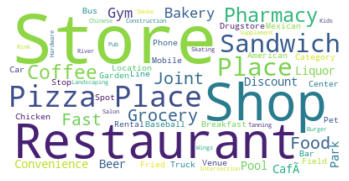

<Figure size 5400x2520 with 0 Axes>

In [56]:
# display the word cloud
plt.imshow(etobicoke_venues_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(75)
fig.set_figheight(35)

plt.show()

In [57]:
#from PIL import Image
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image

Not all mask images have the same format resulting in different outcomes, hence making the WordCloud function not working properly. To make sure that our mask works, let's take a look at it in the numpy array form:

In [58]:
etobicoke_mask = np.array(Image.open("./etobicoke_map.png"))
etobicoke_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

The way the masking functions works is that it requires all white part of the mask should be 255 not 0 (integer type). This value represents the "intensity" of the pixel. Values of 255 are pure white, whereas values of 1 are black. 

Now, you have a new mask in the correct form. Printout the transformed mask is the best way to check if the function works fine. 

With the right mask, you can start making the wordcloud with your selected shape. Notice in the WordCloud function, there is a mask argument that takes in the transformed mask that you created above. The contour_width and contour_color are, as their name, arguments to adjust the outline characteristics of the cloud. 

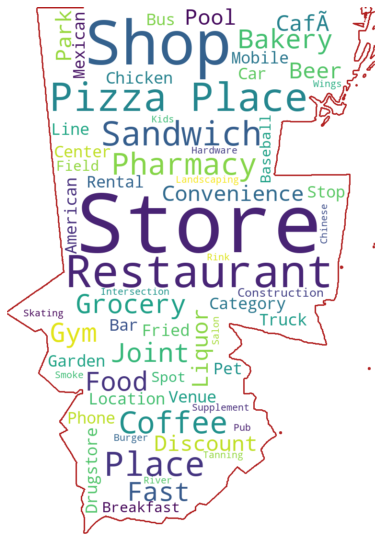

In [59]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=etobicoke_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(venue_WC1)
# generate the word cloud
#etobicoke_venues_WC.generate(venue_WC1)


# store to file
#wc.to_file("./etobicoke1_map.png")

# show
plt.figure(figsize=[15,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# store to file
wc.to_file("./etobicoke1_map.png")



#### Our work is now concentrated in analyzing the Etobicoke neighborhoods regarding venues and what type of categories are specific to which area.

The one-hot encode function will be used explore each Etobicoke neighborhood.

In [60]:
# one hot encoding
etobicoke_onehot = pd.get_dummies(etobicoke_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back into the dataframe
etobicoke_onehot['Neighborhood'] = etobicoke_venues['Neighborhood']

# move the neighborhood column to the first column
fixed_columns = [etobicoke_onehot.columns[-1]] + list(etobicoke_onehot.columns[:-1])
etobicoke_onehot = etobicoke_onehot[fixed_columns]
etobicoke_onehot.head()

Neighborhood  American Restaurant  \
0  South Steeles, Silverstone, Humbergate, Jamest...                    0   
1  South Steeles, Silverstone, Humbergate, Jamest...                    0   
2  South Steeles, Silverstone, Humbergate, Jamest...                    0   
3  South Steeles, Silverstone, Humbergate, Jamest...                    0   
4  South Steeles, Silverstone, Humbergate, Jamest...                    0   

   Bakery  Bar  Baseball Field  Beer Store  Breakfast Spot  Burger Joint  \
0       0    0               0           0               0             0   
1       0    0               0           0               0             0   
2       0    0               0           0               0             0   
3       0    0               0           1               0             0   
4       0    0               0           0               0             0   

   Bus Line  Café  Chinese Restaurant  Coffee Shop  \
0         0     0                   0            0   
1         0     0                   0            0   
2         0     0                   0            0   
3         0     0                   0            0   
4         0     0                   0            0   

   Construction & Landscaping  Convenience Store  Discount Store  Drugstore  \
0                           0                  0               0          0   
1                           0                  0               0          0   
2                           0                  0               0          0   
3                           0                  0               0          0   
4                           0                  0               0          0   

   Fast Food Restaurant  Fried Chicken Joint  Garden Center  Grocery Store  \
0                     0                    0              0              0   
1                     0                    0              0              0   
2                     0                    1              0              0   
3                     0                    0              0              0   
4                     0                    0              0              1   

   Gym  Hardware Store  Intersection  Kids Store  Liquor Store  \
0    0               0             0           0             0   
1    0               0             0           0             0   
2    0               0             0           0             0   
3    0               0             0           0             0   
4    0               0             0           0             0   

   Mexican Restaurant  Mobile Phone Shop  Park  Pet Store  Pharmacy  \
0                   0                  0     0          0         0   
1                   0                  0     0          0         1   
2                   0                  0     0          0         0   
3                   0                  0     0          0         0   
4                   0                  0     0          0         0   

   Pizza Place  Pool  Pub  Rental Car Location  Restaurant  River  \
0            0     0    0                    0           0      0   
1            0     0    0                    0           0      0   
2            0     0    0                    0           0      0   
3            0     0    0                    0           0      0   
4            0     0    0                    0           0      0   

   Sandwich Place  Skating Rink  Smoke Shop  Supplement Shop  Tanning Salon  \
0               1             0           0                0              0   
1               0             0           0                0              0   
2               0             0           0                0              0   
3               0             0           0                0              0   
4               0             0           0                0              0   

   Truck Stop  Wings Joint  
0           0            0  
1           0            0  
2           0            0  
3           0        

The mean of the frequency of occurence of each category will help to group by categories.

In [61]:
etobicoke_grm = etobicoke_onehot.groupby('Neighborhood').mean().reset_index()
etobicoke_grm.head()

Neighborhood  American Restaurant  \
0                             Alderwood, Long Branch                  0.0   
1  Eringate, Bloordale Gardens, Old Burnhamthorpe...                  0.0   
2  Kingsview Village, St. Phillips, Martin Grove ...                  0.0   
3  Mimico NW, The Queensway West, South of Bloor,...                  0.0   
4       New Toronto, Mimico South, Humber Bay Shores                  0.1   

     Bakery  Bar  Baseball Field  Beer Store  Breakfast Spot  Burger Joint  \
0  0.000000  0.0             0.0       0.000             0.0      0.000000   
1  0.000000  0.0             0.0       0.125             0.0      0.000000   
2  0.000000  0.0             0.0       0.000             0.0      0.000000   
3  0.076923  0.0             0.0       0.000             0.0      0.076923   
4  0.100000  0.0             0.0       0.000             0.0      0.000000   

   Bus Line   Café  Chinese Restaurant  Coffee Shop  \
0      0.00  0.000                 0.0     0.111111   
1      0.00  0.125                 0.0     0.125000   
2      0.25  0.000                 0.0     0.000000   
3      0.00  0.000                 0.0     0.000000   
4      0.00  0.100                 0.0     0.000000   

   Construction & Landscaping  Convenience Store  Discount Store  Drugstore  \
0                         0.0           0.000000        0.000000        0.0   
1                         0.0           0.125000        0.000000        0.0   
2                         0.0           0.000000        0.000000        0.0   
3                         0.0           0.076923        0.076923        0.0   
4                         0.0           0.000000        0.000000        0.0   

   Fast Food Restaurant  Fried Chicken Joint  Garden Center  Grocery Store  \
0              0.000000                  0.0            0.0       0.000000   
1              0.000000                  0.0            0.0       0.000000   
2              0.000000                  0.0            0.0       0.000000   
3              0.076923                  0.0            0.0       0.076923   
4              0.100000                  0.0            0.0       0.000000   

        Gym  Hardware Store  Intersection  Kids Store  Liquor Store  \
0  0.111111        0.000000           0.0    0.000000         0.000   
1  0.000000        0.000000           0.0    0.000000         0.125   
2  0.000000        0.000000           0.0    0.000000         0.000   
3  0.076923        0.076923           0.0    0.076923         0.000   
4  0.100000        0.000000           0.0    0.000000         0.100   

   Mexican Restaurant  Mobile Phone Shop  Park  Pet Store  Pharmacy  \
0                 0.0               0.00  0.00      0.000  0.111111   
1                 0.0               0.00  0.00      0.125  0.125000   
2                 0.0               0.25  0.25      0.000  0.000000   
3                 0.0               0.00  0.00      0.000  0.000000   
4                 0.1               0.00  0.00      0.000  0.100000   

   Pizza Place      Pool       Pub  Rental Car Location  Restaurant  River  \
0     0.222222  0.111111  0.111111                  0.0         0.0    0.0   
1     0.125000  0.000000  0.000000                  0.0         0.0    0.0   
2     0.000000  0.000000  0.000000                  0.0         0.0    0.0   
3     0.000000  0.000000  0.000000                  0.0         0.0    0.0   
4     0.100000  0.000000  0.000000                  0.0         0.1    0.0   

   Sandwich Place  Skating Rink  Smoke Shop  Supplement Shop  Tanning Salon  \
0        0.111111      0.111111         0.0         0.000000       0.000000   
1        0.000000      0.000000         0.0         0.000000       0.000000   
2        0.250000      0.000000         0.0         0.000000       0.000000   
3        0.076923      0.000000         0.0         0.076923       0.076923   
4        0.000000      0.000000         0.0         0.000000       0.000000   

   Truck Stop  Wings Joint  
0     

An easy way to visualize the top 10 most common venues is to put togheter into a dataframe.

First we will create a function to sort the venues in descending order.

In [62]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [63]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# creating columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# creating a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = etobicoke_grm['Neighborhood']

for ind in np.arange(etobicoke_grm.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(etobicoke_grm.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

Neighborhood  \
0                              Alderwood, Long Branch   
1   Eringate, Bloordale Gardens, Old Burnhamthorpe...   
2   Kingsview Village, St. Phillips, Martin Grove ...   
3   Mimico NW, The Queensway West, South of Bloor,...   
4        New Toronto, Mimico South, Humber Bay Shores   
5                 Northwest, West Humber - Clairville   
6   Old Mill South, King's Mill Park, Sunnylea, Hu...   
7   South Steeles, Silverstone, Humbergate, Jamest...   
8       The Kingsway, Montgomery Road, Old Mill North   
9   West Deane Park, Princess Gardens, Martin Grov...   
10                                          Westmount   

         1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                  Pizza Place                   Gym          Skating Rink   
1                  Coffee Shop              Pharmacy            Beer Store   
2               Sandwich Place     Mobile Phone Shop                  Park   
3                  Wings Joint            Kids Store                Bakery   
4          American Restaurant            Restaurant                   Gym   
5                   Truck Stop                   Bar         Garden Center   
6   Construction & Landscaping        Baseball Field        Breakfast Spot   
7                Grocery Store              Pharmacy   Fried Chicken Joint   
8                         Pool            Smoke Shop                 River   
9                       Bakery           Wings Joint           Coffee Shop   
10                 Pizza Place    Chinese Restaurant          Intersection   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0         Sandwich Place           Coffee Shop                   Pub   
1           Liquor Store     Convenience Store                  Café   
2               Bus Line           Wings Joint           Coffee Shop   
3           Burger Joint     Convenience Store        Discount Store   
4   Fast Food Restaurant          Liquor Store    Mexican Restaurant   
5              Drugstore   Rental Car Location           Coffee Shop   
6            Wings Joint         Grocery Store         Garden Center   
7   Fast Food Restaurant            Beer Store        Sandwich Place   
8                   Park    Chinese Restaurant   Fried Chicken Joint   
9          Grocery Store         Garden Center   Fried Chicken Joint   
10        Sandwich Place        Discount Store           Coffee Shop   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                   Pool              Pharmacy                  Café   
1              Pet Store           Pizza Place   Fried Chicken Joint   
2    Fried Chicken Joint  Fast Food Restaurant             Drugstore   
3   Fast Food Restaurant         Grocery Store                   Gym   
4               Pharmacy                  Café           Pizza Place   
5          Grocery Store   Fried Chicken Joint  Fast Food Restaurant   
6    Fried Chicken Joint  Fast Food Restaurant             Drugstore   
7            Coffee Shop           Pizza Place           Wings Joint   
8   Fast Food Restaurant             Drugstore        Discount Store   
9   Fast Food Restaurant             Drugstore        Discount Store   
10   Fried Chicken Joint  Fast Food Restaurant             Drugstore   

   10th Most Common Venue  
0               Drugstore  
1    Fast Food Restaurant  
2          Discount Store  
3          Hardware Store  
4                  Bakery  
5          Discount Store  
6          Discount Store  
7               Drugstore  
8       Convenience Store  
9       Convenience Store  
10      Convenience Store

Our decision to advise which Etobicoke neighborhood is optimum to start a Pizza place business must be based primordially on the areas with no Pizza places.

From our newly created panda dataframe we need to sortout the neighborhoods missing a Pizza place.

For this step we will create a new dataframe containing only these neighborhoods.

In [64]:
no_pizza = etobicoke_grm[etobicoke_grm["Pizza Place"]==0]
no_pizza=no_pizza[["Neighborhood"]]
no_pizza.head()

Neighborhood
2  Kingsview Village, St. Phillips, Martin Grove ...
3  Mimico NW, The Queensway West, South of Bloor,...
5                Northwest, West Humber - Clairville
6  Old Mill South, King's Mill Park, Sunnylea, Hu...
8      The Kingsway, Montgomery Road, Old Mill North

It is also important to have a look at neighborhoods that already have Pizza places present.

In [65]:
pizza = etobicoke_grm[etobicoke_grm["Pizza Place"]>=.1]
pizza[["Neighborhood", "Pizza Place"]]

Neighborhood  Pizza Place
0                              Alderwood, Long Branch     0.222222
1   Eringate, Bloordale Gardens, Old Burnhamthorpe...     0.125000
4        New Toronto, Mimico South, Humber Bay Shores     0.100000
7   South Steeles, Silverstone, Humbergate, Jamest...     0.111111
10                                          Westmount     0.285714

To have a better distribution picture of Etobicoke neighborhoods with Pizza Places that are already operated, we will create a histogram.

<ipython-input-66-fc6965391f55>:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


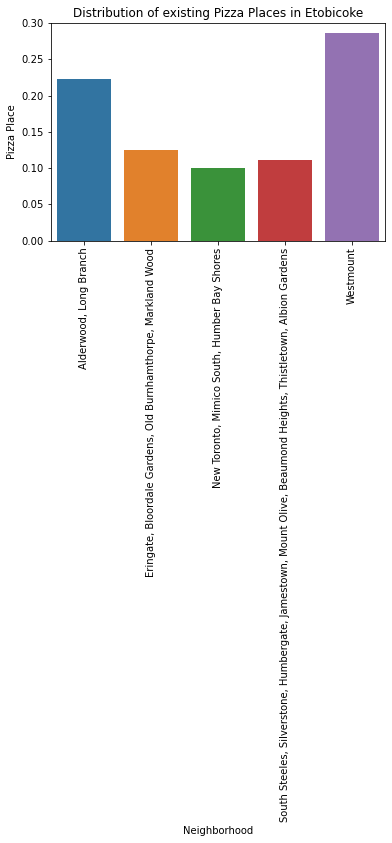

In [66]:
sns.barplot(x="Neighborhood", y="Pizza Place", data=pizza)
plt.title("Distribution of existing Pizza Places in Etobicoke")
#plt.show()
plt.xticks(rotation=90)
plt.tight_layout()

As we can see there are quite few neighborhoods in Etobicoke with Pizza Places and that make them very desirable for people to spend time in these areas.

### Visualizing the neighborhoods with no Pizza places.

With a new panda dataframe created for neighborhoods with no Pizza places created, we need to merge it with our dataframe containing the latitude and longitude.

In [67]:
plot_nopizza = pd.merge(no_pizza, geo_data, how='inner', on="Neighborhood")
plot_nopizza = plot_nopizza[["Neighborhood", 'Population_2016', 'AfterTaxIncome2015',"Latitude", "Longitude"]]
#plot_nopizza.head(20)
#plot_nopizza.sort_index(inplace=True, axis=1)
plot_nopizza = plot_nopizza.sort_values(by =['AfterTaxIncome2015','Population_2016'], ascending=False)
#plot_nopizza = plot_nopizza.sort_values(by ='Population_2016', ascending=False)
plot_nopizza.head(20)

Neighborhood  Population_2016  \
4      The Kingsway, Montgomery Road, Old Mill North          10787.0   
5  West Deane Park, Princess Gardens, Martin Grov...          32400.0   
1  Mimico NW, The Queensway West, South of Bloor,...          17038.0   
0  Kingsview Village, St. Phillips, Martin Grove ...          33743.0   
3  Old Mill South, King's Mill Park, Sunnylea, Hu...          21299.0   
2                Northwest, West Humber - Clairville          40684.0   

   AfterTaxIncome2015   Latitude  Longitude  
4             97210.0  43.653654 -79.506944  
5             91110.0  43.650943 -79.554724  
1             78903.0  43.628841 -79.520999  
0             67497.0  43.688905 -79.554724  
3             63142.0  43.636258 -79.498509  
2             59873.0  43.706748 -79.594054

Using folium library we will plot the neighborhoods with no Pizza Places.

In [68]:
map_nopizza = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, neighborhood in zip(plot_nopizza['Latitude'], plot_nopizza['Longitude'], plot_nopizza['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng], radius=5, popup=label, color='blue', fill=True, fill_color="#3186cc", parse_html=False).add_to(map_nopizza)
map_nopizza

### Clustering the Neighborhoods using k-means.

#### There are different methods to determine optimim K-means and Silhouette Method. We will use The Elbow Method at first to determine the Elbow curbe. In case K-mean is not evident, we will use Silhouette Method to validate an optimum k-mean number for clustering.

#### The Elbow Method is more of a decision rule, while the Silhouette is a metric used for validation while clustering. Thus, it can be used in combination with the Elbow Method.

#### The Elbow Method and the Silhouette Method are not alternatives to each other for finding the optimal K. Rather they are tools to be used together for a more confident decision.

#### We are using now the Elbow method of determining the number cluster that will use to cluster the data in. 

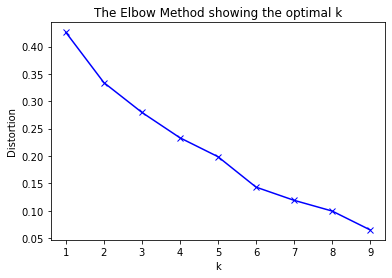

In [69]:
etobicoke_grm_clustering = etobicoke_grm.drop('Neighborhood', 1)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(etobicoke_grm_clustering)
    kmeanModel.fit(etobicoke_grm_clustering)
    distortions.append(sum(np.min(cdist(etobicoke_grm_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / etobicoke_grm_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### We can observe that the “elbow” is not clearly defined.

#### In the next step, we will use the Silhoute method to look for an optimum k-mean.  

In [70]:
etobicoke_grm_clustering = etobicoke_grm.drop('Neighborhood', 1)

for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster).fit(etobicoke_grm_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(etobicoke_grm_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.43906275056385835
For n_clusters=3, The Silhouette Coefficient is 0.21870597887001988
For n_clusters=4, The Silhouette Coefficient is 0.15833184003963233
For n_clusters=5, The Silhouette Coefficient is 0.15254729158574218
For n_clusters=6, The Silhouette Coefficient is 0.15385182781781304
For n_clusters=7, The Silhouette Coefficient is 0.060654512858218504
For n_clusters=8, The Silhouette Coefficient is 0.052237379935207356
For n_clusters=9, The Silhouette Coefficient is 0.03242962949996464


First, let's determine the optimal value of K for our dataset using the Silhouette Coefficient Method

From sklearn documentation - https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

A higher Silhouette Coefficient score relates to a model with better-defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores: `

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient is for a single sample is then given as:

s=b-a/max(a,b)

Now, to find the optimal value of k for KMeans, loop through 1..n for n_clusters in KMeans and calculate Silhouette Coefficient for each sample.

A higher Silhouette Coefficient indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.


#### We will analize Etobicoke map for neighborhoods using k-means 2. 

In [71]:
k = 2
X = etobicoke_grm.drop('Neighborhood', axis = 1)
# run k-means clustering
kmeans = KMeans(n_clusters = k, random_state=0, init="k-means++")
kmeans.fit(X)



KMeans(n_clusters=2, random_state=0)

In [72]:
new_cluster_df = pd.merge(etobicoke_grm, geo_data, how='inner', on='Neighborhood')
new_cluster_df=new_cluster_df[["Neighborhood", 'Population_2016','AfterTaxIncome2015', "Latitude", "Longitude"]]
new_cluster_df.drop_duplicates(subset=["Neighborhood"], inplace=True)
new_cluster_df['Cluster Labels'] = kmeans.labels_
new_cluster_df.set_index("Neighborhood", inplace=True)
new_cluster_df.reset_index(inplace=True)
new_cluster_df.head(20)

Neighborhood  Population_2016  \
0                              Alderwood, Long Branch          20674.0   
1   Eringate, Bloordale Gardens, Old Burnhamthorpe...          38291.0   
2   Kingsview Village, St. Phillips, Martin Grove ...          33743.0   
3   Mimico NW, The Queensway West, South of Bloor,...          17038.0   
4        New Toronto, Mimico South, Humber Bay Shores          37975.0   
5                 Northwest, West Humber - Clairville          40684.0   
6   Old Mill South, King's Mill Park, Sunnylea, Hu...          21299.0   
7   South Steeles, Silverstone, Humbergate, Jamest...          55959.0   
8       The Kingsway, Montgomery Road, Old Mill North          10787.0   
9   West Deane Park, Princess Gardens, Martin Grov...          32400.0   
10                                          Westmount          20874.0   

    AfterTaxIncome2015   Latitude  Longitude  Cluster Labels  
0              63602.0  43.602414 -79.543484               0  
1              67878.0  43.643515 -79.577201               0  
2              67497.0  43.688905 -79.554724               0  
3              78903.0  43.628841 -79.520999               0  
4              53099.0  43.605647 -79.501321               0  
5              59873.0  43.706748 -79.594054               0  
6              63142.0  43.636258 -79.498509               0  
7              55443.0  43.739416 -79.588437               0  
8              97210.0  43.653654 -79.506944               0  
9              91110.0  43.650943 -79.554724               1  
10             64448.0  43.696319 -79.532242               0

Below is shown a table with the most 10 venues for each neighborhood, including the cluster column as well.

In [73]:
#new_cluster_df['Cluster_Labels'] = kmeans.labels_
#new_cluster_df.head()

# adding clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

etobicoke_merged = new_cluster_df

# merging inside_the_beltline_grouped with inside_the_beltline to add latitude/longitude for each neighborhood
etobicoke_merged = etobicoke_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on= 'Neighborhood')

etobicoke_merged # checking the last columns!


Neighborhood  Population_2016  \
0                              Alderwood, Long Branch          20674.0   
1   Eringate, Bloordale Gardens, Old Burnhamthorpe...          38291.0   
2   Kingsview Village, St. Phillips, Martin Grove ...          33743.0   
3   Mimico NW, The Queensway West, South of Bloor,...          17038.0   
4        New Toronto, Mimico South, Humber Bay Shores          37975.0   
5                 Northwest, West Humber - Clairville          40684.0   
6   Old Mill South, King's Mill Park, Sunnylea, Hu...          21299.0   
7   South Steeles, Silverstone, Humbergate, Jamest...          55959.0   
8       The Kingsway, Montgomery Road, Old Mill North          10787.0   
9   West Deane Park, Princess Gardens, Martin Grov...          32400.0   
10                                          Westmount          20874.0   

    AfterTaxIncome2015   Latitude  Longitude  Cluster Labels  \
0              63602.0  43.602414 -79.543484               0   
1              67878.0  43.643515 -79.577201               0   
2              67497.0  43.688905 -79.554724               0   
3              78903.0  43.628841 -79.520999               0   
4              53099.0  43.605647 -79.501321               0   
5              59873.0  43.706748 -79.594054               0   
6              63142.0  43.636258 -79.498509               0   
7              55443.0  43.739416 -79.588437               0   
8              97210.0  43.653654 -79.506944               0   
9              91110.0  43.650943 -79.554724               1   
10             64448.0  43.696319 -79.532242               0   

         1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                  Pizza Place                   Gym          Skating Rink   
1                  Coffee Shop              Pharmacy            Beer Store   
2               Sandwich Place     Mobile Phone Shop                  Park   
3                  Wings Joint            Kids Store                Bakery   
4          American Restaurant            Restaurant                   Gym   
5                   Truck Stop                   Bar         Garden Center   
6   Construction & Landscaping        Baseball Field        Breakfast Spot   
7                Grocery Store              Pharmacy   Fried Chicken Joint   
8                         Pool            Smoke Shop                 River   
9                       Bakery           Wings Joint           Coffee Shop   
10                 Pizza Place    Chinese Restaurant          Intersection   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0         Sandwich Place           Coffee Shop                   Pub   
1           Liquor Store     Convenience Store                  Café   
2               Bus Line           Wings Joint           Coffee Shop   
3           Burger Joint     Convenience Store        Discount Store   
4   Fast Food Restaurant          Liquor Store    Mexican Restaurant   
5              Drugstore   Rental Car Location           Coffee Shop   
6            Wings Joint         Grocery Store         Garden Center   
7   Fast Food Restaurant            Beer Store        Sandwich Place   
8                   Park    Chinese Restaurant   Fried Chicken Joint   
9          Grocery Store         Garden Center   Fried Chicken Joint   
10        Sandwich Place        Discount Store           Coffee Shop   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                   Pool              Pharmacy                  Café   
1              Pet Store           Pizza Place   Fried Chicken Joint   
2    Fried Chicken Joint  Fast Food Restaurant             Drugstore   
3   Fast Food Restaurant         Grocery Store                   Gym   
4               Pharmacy                  Café           Pizza Place   
5          Grocery Store   Fried Chicken Joint  Fast Food Restaurant   
6    Fried Chicken Joint  Fast Food Restaurant             Drugstore   
7    

## 4. Results <a name="results"></a> 

#### Now is the time to visualize the clusters.

In [90]:
#PLEASE REVIEW IN https://nbviewer.jupyter.org/ As Per Instrucions In The Technical Help Section of Coursea Github will not render folium maps
#https://github.com/adytas/Capstone-Project---The-Battle-of-Neighborhoods-Week-2-/Applied Data Science Capstone Battle of the Neighborhoods in Toronto4.ipynb

map_clustered = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(new_cluster_df['Latitude'], new_cluster_df['Longitude'],
                                  new_cluster_df['Neighborhood'], new_cluster_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clustered)
       
map_clustered

### Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster.

#### Cluster 1

In [75]:
etobicoke_cluster1=etobicoke_merged.loc[etobicoke_merged['Cluster Labels'] == 0, etobicoke_merged.columns[[0] + list(range(1, etobicoke_merged.shape[1]))]]

In [76]:
etobicoke_cluster1

Neighborhood  Population_2016  \
0                              Alderwood, Long Branch          20674.0   
1   Eringate, Bloordale Gardens, Old Burnhamthorpe...          38291.0   
2   Kingsview Village, St. Phillips, Martin Grove ...          33743.0   
3   Mimico NW, The Queensway West, South of Bloor,...          17038.0   
4        New Toronto, Mimico South, Humber Bay Shores          37975.0   
5                 Northwest, West Humber - Clairville          40684.0   
6   Old Mill South, King's Mill Park, Sunnylea, Hu...          21299.0   
7   South Steeles, Silverstone, Humbergate, Jamest...          55959.0   
8       The Kingsway, Montgomery Road, Old Mill North          10787.0   
10                                          Westmount          20874.0   

    AfterTaxIncome2015   Latitude  Longitude  Cluster Labels  \
0              63602.0  43.602414 -79.543484               0   
1              67878.0  43.643515 -79.577201               0   
2              67497.0  43.688905 -79.554724               0   
3              78903.0  43.628841 -79.520999               0   
4              53099.0  43.605647 -79.501321               0   
5              59873.0  43.706748 -79.594054               0   
6              63142.0  43.636258 -79.498509               0   
7              55443.0  43.739416 -79.588437               0   
8              97210.0  43.653654 -79.506944               0   
10             64448.0  43.696319 -79.532242               0   

         1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                  Pizza Place                   Gym          Skating Rink   
1                  Coffee Shop              Pharmacy            Beer Store   
2               Sandwich Place     Mobile Phone Shop                  Park   
3                  Wings Joint            Kids Store                Bakery   
4          American Restaurant            Restaurant                   Gym   
5                   Truck Stop                   Bar         Garden Center   
6   Construction & Landscaping        Baseball Field        Breakfast Spot   
7                Grocery Store              Pharmacy   Fried Chicken Joint   
8                         Pool            Smoke Shop                 River   
10                 Pizza Place    Chinese Restaurant          Intersection   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0         Sandwich Place           Coffee Shop                   Pub   
1           Liquor Store     Convenience Store                  Café   
2               Bus Line           Wings Joint           Coffee Shop   
3           Burger Joint     Convenience Store        Discount Store   
4   Fast Food Restaurant          Liquor Store    Mexican Restaurant   
5              Drugstore   Rental Car Location           Coffee Shop   
6            Wings Joint         Grocery Store         Garden Center   
7   Fast Food Restaurant            Beer Store        Sandwich Place   
8                   Park    Chinese Restaurant   Fried Chicken Joint   
10        Sandwich Place        Discount Store           Coffee Shop   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                   Pool              Pharmacy                  Café   
1              Pet Store           Pizza Place   Fried Chicken Joint   
2    Fried Chicken Joint  Fast Food Restaurant             Drugstore   
3   Fast Food Restaurant         Grocery Store                   Gym   
4               Pharmacy                  Café           Pizza Place   
5          Grocery Store   Fried Chicken Joint  Fast Food Restaurant   
6    Fried Chicken Joint  Fast Food Restaurant             Drugstore   
7            Coffee Shop           Pizza Place           Wings Joint   
8   Fast Food Restaurant             Drugstore        Discount Store   
10   Fried Chicken Joint  Fast Food Restaurant             Drugstore   

   10th Most Common Venue  
0               Drugstore  
1    Fast Food Resta

#### Cluster 2

In [77]:
etobicoke_cluster2=etobicoke_merged.loc[etobicoke_merged['Cluster Labels'] == 1, etobicoke_merged.columns[[0] + list(range(1, etobicoke_merged.shape[1]))]]

In [78]:
etobicoke_cluster2

Neighborhood  Population_2016  \
9  West Deane Park, Princess Gardens, Martin Grov...          32400.0   

   AfterTaxIncome2015   Latitude  Longitude  Cluster Labels  \
9             91110.0  43.650943 -79.554724               1   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
9                Bakery           Wings Joint           Coffee Shop   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
9         Grocery Store         Garden Center   Fried Chicken Joint   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
9  Fast Food Restaurant             Drugstore        Discount Store   

  10th Most Common Venue  
9      Convenience Store

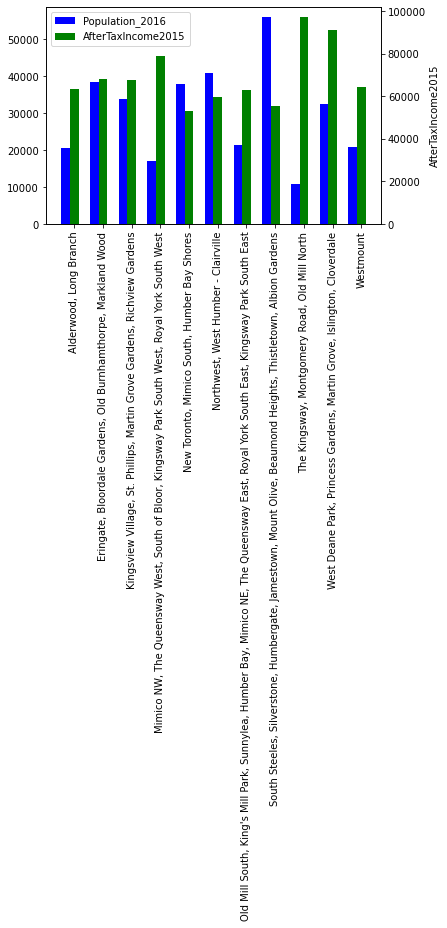

In [86]:
x = np.arange(11)
ax1 = plt.subplot(1,1,1)

#ax= df_income.plot(x="Neighborhood", y="#Total Resto", kind="bar", figsize=(15, 8), color="blue",fontsize=14)
w = 0.3
#plt.xticks(), will label the bars on x axis with the respective country names.
plt.xticks(x + w, etobicoke_merged['Neighborhood'], rotation='vertical')
pop =ax1.bar(x, etobicoke_merged['Population_2016'], width=w, color='b', align='center')
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()

income =ax2.bar(x + w, etobicoke_merged['AfterTaxIncome2015'], width=w,color='g',align='center')
#Set the Y axis label.
plt.ylabel('AfterTaxIncome2015')
plt.xlabel('Population_2016')
#To set the legend on the plot we have used plt.legend()
plt.legend([pop, income],['Population_2016', 'AfterTaxIncome2015'])
#To show the plot finally we have used plt.show().
plt.savefig('plotpopincome.png.png',dpi=300, bbox_inches='tight')
plt.show()
#fig.savefig('plotpopincome.png')

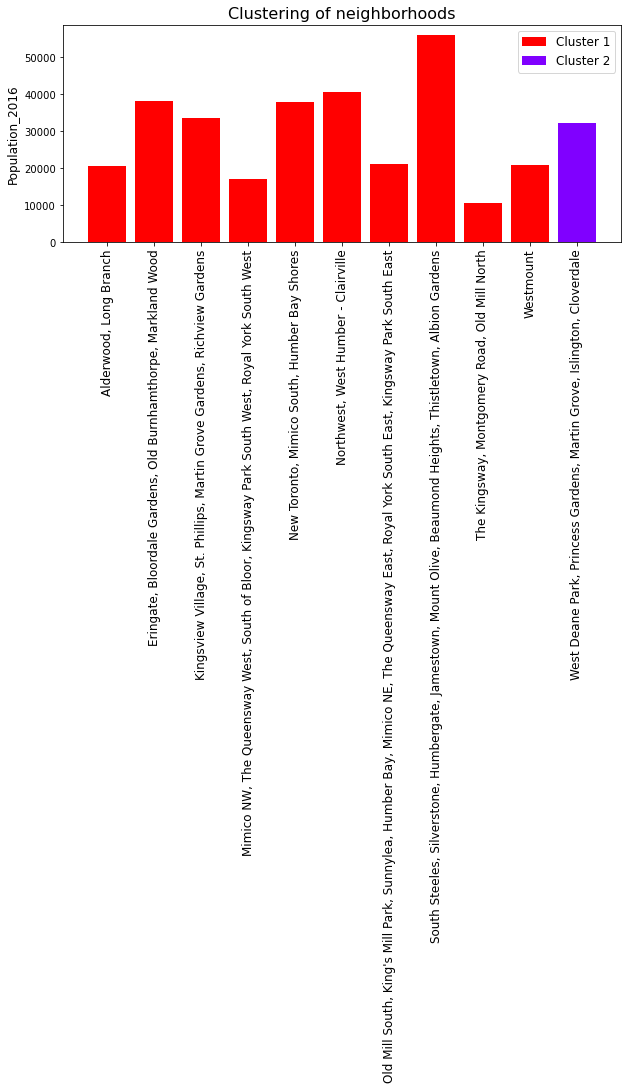

In [87]:
plt.figure(figsize=(10, 4))
g1 = plt.bar(etobicoke_cluster1["Neighborhood"], etobicoke_cluster1["Population_2016"],color=rainbow[-1])
g2 = plt.bar(etobicoke_cluster2["Neighborhood"], etobicoke_cluster2["Population_2016"],color=rainbow[0])

plt.xticks(rotation = 'vertical',fontsize=12)
plt.ylabel('Population_2016',fontsize=12)
plt.title('Clustering of neighborhoods',fontsize=16)
plt.legend([g1,g2],['Cluster 1','Cluster 2'],fontsize=12)
plt.savefig('plotpopulation.png.png',dpi=300, bbox_inches='tight')
plt.show()

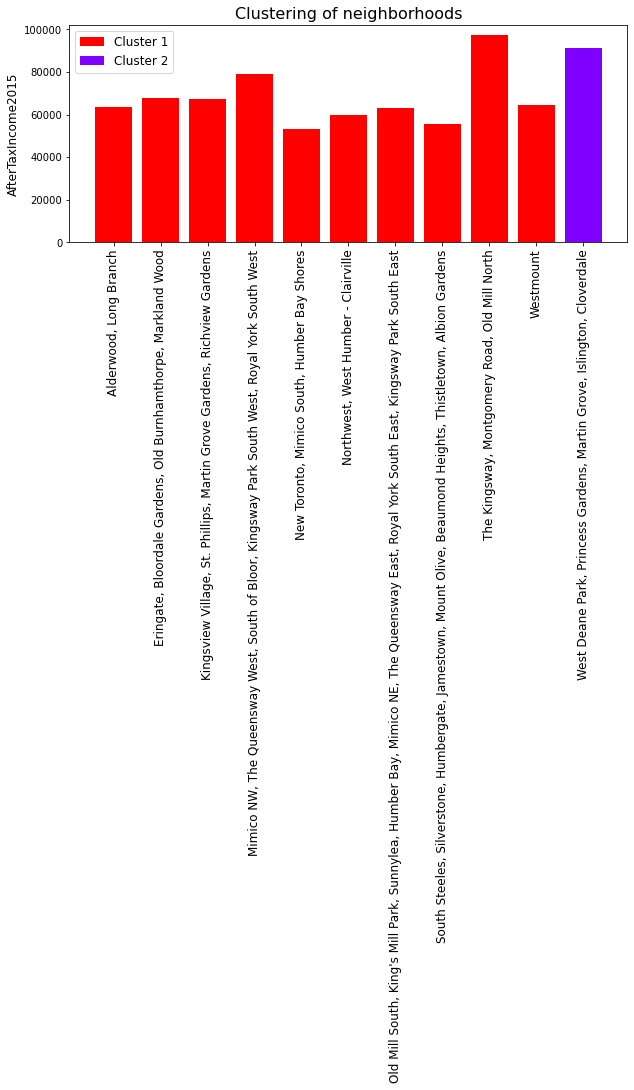

In [88]:
plt.figure(figsize=(10, 4))
g1 = plt.bar(etobicoke_cluster1["Neighborhood"], etobicoke_cluster1["AfterTaxIncome2015"],color=rainbow[-1])
g2 = plt.bar(etobicoke_cluster2["Neighborhood"], etobicoke_cluster2["AfterTaxIncome2015"],color=rainbow[0])

plt.xticks(rotation = 'vertical',fontsize=12)
plt.ylabel('AfterTaxIncome2015',fontsize=12)
plt.title('Clustering of neighborhoods',fontsize=16)
plt.legend([g1,g2],['Cluster 1','Cluster 2'],fontsize=12)
plt.savefig('plotincome.png.png',dpi=300, bbox_inches='tight')
plt.show()


  ## 5. Discussions <a name="discussions"></a>

The first step towards choosing an optimum location for opening a new Pizza Place in Etobicoke borough of Toronto is exploring carefully all its neighborhoods. By examining each neighborhood for the presence of other Pizza Places and counting their numbers, we determine the neighborhoods lacking these places.

Other critical factors that we accounted for in our analysis are the number of people in the neighborhood, neighborhood income and the number of people with Italian descent.

Cluster 2 has only one neighborhood with the optimum population/income relative to other neighborhoods with no Pizza Places: West Dean Park, Princess Gardens, Martin Groves, Islington, Cloverdale.

There are other neighborhoods on Cluster 1 that is worth our attention: 

-	South Steeles, Silverstone, Humbergate, Jamestone
-	Northwest, West Humber – Clairville

There is a correlation of the neighborhoods with the higher population and higher income having Pizza Place as the most venues in the area.

Etobicoke Centre has the most Italian ethnic population from Etobicoke.

Another factor to differentiate between the three chosen neighborhoods with no Pizza Place is the Italian ethnic community numbers. 

We will factor in the four parameters to determine the optimum neighborhood to open a Pizza Place: no existing Pizza Place in the neighborhood, population numbers, income after tax and the Italian ethnic group numbers.

The only neighborhood situated on Etobicoke Centre is the one from Cluster 2: West Dean Park, Princess Gardens, Martin Groves, Islington, Cloverdale.

Also West Dean Park, Princess Gardens, Martin Groves, Islington, Cloverdale has a high number of population with high income after tax, which makes it a good candidate to open a Pizza Place there.

We already found out that the optimum neighborhood to choose a Piza Place location relative to population/income is West Dean Park, Princess Gardens, Martin Groves, Islington, Cloverdale.

Based on our analysis considering the number of people in the neighborhood, neighborhood income, the number of people with Italian descent and no Pizza Place existent in the neighborhood, is a good idea to open a Pizza Place on West Dean Park, Princess Gardens, Martin Groves, Islington, Cloverdale. 




<h2> 6. Conclusion </h2> <a name="conclusion"></a>

During this project we have identified the business problem, looking into which data will be beneficial for our analysis and processing the gathered data from various web sources. By using unsupervised machine learning algorithm using k-means clustering we were able to cluster Etobicoke neighborhoods to provide an optimum location for opening a Pizza Place.

Final decision should take into account other factors as parking, major roads close by, proximity to other various venues, and real estate rent values and also future business area developments.


<h2> 7. References </h2> <a name="references"></a>

[1]*"Census Profile, 2016 Census". www12.statcan.gc.ca. Statistics Canada.

[2]*"Portrait of the Canadian Population in 2006: Subprovincial population dynamics, 

[3]*Toronto Neighbourhood Profiles. Retrieved from https://www.toronto.ca/city-government/data-research-maps/neighbourhoods-communities/neighbourhood-profiles/

[4]*Opening a Restaurant – Why Location is Important https://idealsoftware.co.za/opening-a-restaurant-why-location-is-important/
